In [13]:

import pandas as pd
import numpy as np
import os
import json
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import accuracy_score
from sklearn.metrics import classification_report
inl=[]
out=[]
for i in os.listdir('./data/inl'):
    inl.append(json.loads(open('./data/inl/'+i,'r').read()))
#Since there is no normal set we are considering other groups as outlier data
for i in os.listdir('./data/out'):
    out.append(json.loads(open('./data/out/'+i,'r').read()))
df1=pd.DataFrame(inl)
df2=pd.DataFrame(out)
print(df1)

      entityId entityType    event                     eventTime  \
0       1000.0    content  malware  2016-12-15T09:01:48.640+0000   
1       1001.0    content  malware  2016-12-15T09:01:48.684+0000   
2       1002.0    content  malware  2016-12-15T09:01:48.736+0000   
3       1003.0    content  malware  2016-12-15T09:01:48.779+0000   
4       1006.0    content  malware  2016-12-15T09:01:48.856+0000   
...        ...        ...      ...                           ...   
2018     992.0    content  malware  2016-12-15T09:03:59.754+0000   
2019     993.0    content  malware  2016-12-15T09:03:59.777+0000   
2020     994.0    content  malware  2016-12-15T09:03:59.793+0000   
2021       NaN        NaN      NaN                           NaN   
2022       NaN        NaN      NaN                           NaN   

                                             properties  \
0     {'file_access': '3d801aa5 09e592c4 98e83379 3d...   
1     {'file_access': 'd41d8cd9 913f9c49 96da6d37 8b...   
2     

In [17]:
df1=df1.fillna(0)
df2=df2.fillna(0)
df=pd.DataFrame()

In [18]:
for i in df1.columns:
    df[i]=df2[i]

In [4]:
from sklearn.feature_extraction.text import TfidfVectorizer
vectorizer = TfidfVectorizer(max_features=190, stop_words='english', use_idf=True, ngram_range=(1, 3))

In [5]:
df11=vectorizer.fit_transform(df1)
df22=vectorizer.fit_transform(df)

In [6]:
def normal_accuracy(values):
    tp=list(values).count(1)
    total=values.shape[0]
    accuracy=np.round(tp/total,4)
    return accuracy

def attack_accuracy(values):
    tn=list(values).count(-1)
    total=values.shape[0]
    accuracy=np.round(tn/total,4)
    return accuracy

In [7]:
from sklearn.ensemble import IsolationForest as IF
ifmodel = IF(max_samples=100)
ifmodel.fit(df11)
normal_isf = ifmodel.predict(df11)
fraud_isf = ifmodel.predict(df22)
ifin_accuracy_isf=normal_accuracy(normal_isf)
ifout_accuracy_isf=attack_accuracy(fraud_isf)


C:\Users\Vinnu\anaconda3\lib\site-packages\sklearn\ensemble\_iforest.py:263: UserWarning: max_samples (100) is greater than the total number of samples (22). max_samples will be set to n_samples for estimation.
  warn("max_samples (%s) is greater than the "


In [8]:


print("Accuracy in Detecting Normal Cases:", ifin_accuracy_isf)
print("Accuracy in Detecting Fraud Cases:", ifout_accuracy_isf)





Accuracy in Detecting Normal Cases: 1.0
Accuracy in Detecting Fraud Cases: 0.0


In [9]:

from sklearn.neighbors import LocalOutlierFactor as LOF
import warnings
warnings.filterwarnings('ignore')
lofmodel = LOF(novelty=True)
lofmodel.fit(df11)

normal_lof = lofmodel.predict(df11)
fraud_lof = lofmodel.predict(df22)

in_accuracy_lof=normal_accuracy(normal_lof)
out_accuracy_lof=attack_accuracy(fraud_lof)



In [10]:


print("Accuracy in Detecting Normal Cases:", in_accuracy_lof)
print("Accuracy in Detecting Fraud Cases:", out_accuracy_lof)





Accuracy in Detecting Normal Cases: 1.0
Accuracy in Detecting Fraud Cases: 0.0


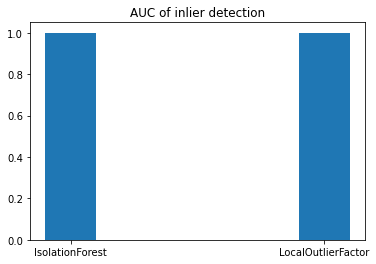

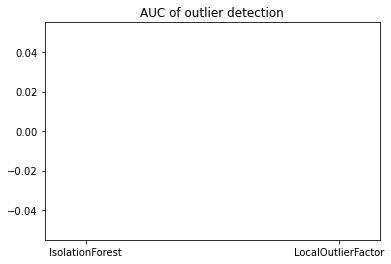

In [11]:

import matplotlib.pyplot as plt
plt.bar(["IsolationForest","LocalOutlierFactor"],[ifin_accuracy_isf,in_accuracy_lof],width=0.2)
plt.title("AUC of inlier detection")
plt.show()
plt.bar(["IsolationForest","LocalOutlierFactor"],[ifout_accuracy_isf,out_accuracy_lof],width=0.2)
plt.title("AUC of outlier detection")
plt.show()